In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline

In [2]:
white_turbo_colormap = mpl.colors.ListedColormap(np.load('white_turbo.npy'))

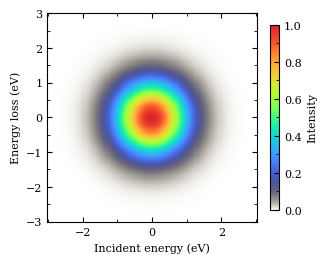

In [3]:
X, Y = np.meshgrid(np.linspace(-3, 3, 200),
                   np.linspace(-3, 3, 200))

Z = np.exp(-(X**2+Y**2))

fig, ax = plt.subplots(figsize=(3+3/8, 3))

art = ax.pcolor(X, Y, Z, shading='auto', cmap=white_turbo_colormap,
                vmin=0, vmax=1,
                alpha=1, linewidth=0, rasterized=True)
cb = plt.colorbar(art, ax=ax, shrink=0.8)

ax.set_xlabel('Incident energy (eV)')
ax.set_ylabel('Energy loss (eV)')
cb.set_label('Intensity')

ax.set_aspect('equal')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))
cb.set_ticks(ticker.MultipleLocator(0.2))
cb.ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(2))

fig.savefig('ex_21_new_colormap.pdf', dpi=1200)